# Figures in Python

Making figures that visualize your data is one of the most important tools in Python.

Here, we look at a few ways of visualizing data using the library Matplotlib. For specifically statistics I can also reccomment the Seaborn package. 

In [1]:
import numpy as np # for array operation and maths
import matplotlib.pyplot as plt # for figures
import matplotlib
import sys
# !!! Replace W:\Work\Documents\GEOF_UiB\Python with the path 
# on YOUR PC !!! 
# One clean way to do this is to locate your EkteDataFunk.py-file, 
# right-click it, and use the 'Copy Path' command
sys.path.append(r"W:\Work\Documents\GEOF_UiB\Python")
from EkteDataFunk import loadData # to load data

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Load the dataset of temperature in Bergen since 1960.

In [4]:
file='TempBergenYearlyNonan.txt'
temp,time = loadData(file)

#### Lineplot
We've already worked with line plots. For a function f(x), x is on the x-axis, and f(x) is on the y-axis, in our case, x is time and f(x) is temperature. 

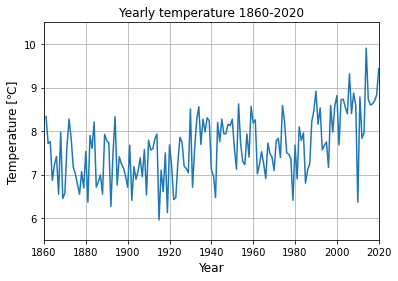

In [5]:
ax=plt.axes() # Make axes to plot in

# Plot the time series
ax.plot(time, temp)

# Define grid, labels etc.
ax.set(
    title='Yearly temperature 1860-2020',
    xlabel='Year',
    ylabel='Temperature [\u2103]', 
    xlim=[1860,2020], # limit the x-axis
    ylim=[5.5,10.5] # limit the y-axis
) 
ax.grid() # add a grid in the background
plt.show() 

There are lots of options when making figures. All colors, font size, figure size, axes, limits, labels on axis etc. can be changed. We touched upon this briefly in the exercise [Documentation and erors](https://github.com/julienweihs/GEOF/blob/main/Jupyter/Part7_Documentation_and_errors.ipynb). 

To figure out how to change something, google the function and whatever you want to change. 

Let's say that you want the line to be orange instead of blue, and to show all data points with a red star with black border. Google, e.g., "plt.plot line color python", and press the result that sends you to matplotlib's documentation pages, in this case, [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). This is a long page of documentation - it takes some practice to know where to look for the information you're after. In this case, I'd scroll down to "other paramters". Under ** kwargs, i.e., keyword arguments, there's a long list of Properties and their keywords. `color` is an example of a property, while `green` is a keyword argument. You use this input like this: `plt.plot(tid,temp), color='green')`. This gives a green line. `color='green'` is a "keyword argument pair". 

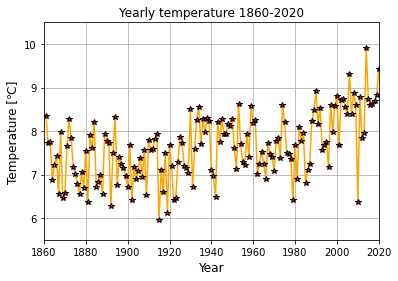

In [7]:
ax=plt.axes()

# Plot the time series and define how the line should look
ax.plot(
    tid,temp,
    color='orange',
    marker='*',
    markerfacecolor='red',
    markeredgecolor='k' # 'k' stands for black
)

# Define grid, labels etc.
ax.set(
    title='Yearly temperature 1860-2020',
    xlabel='Year',
    ylabel='Temperature [\u2103]', 
    xlim=[1860,2020], # limit the x-axis
    ylim=[5.5,10.5] # limit the y-axis
) 
ax.grid() # add a grid in the background
plt.show() 

### Exercise 1: 
Make a similar figure to the one above, but use purple circles and remove the line. 

### Exercise 2:
Make the same figure as above, but make the title larger. This requires a new seach in the documentation. Hint: Include "title", "fontsize", and "matplotlib" in the search words. Select new colors, markers and line style. 

## Histogram

*Note: matplotlib is useful to get an impression of the distribution, but if you want to make a nice figure with maybe just the probability density and not the bars, I'd suggest using the Seaborn package.*

Histograms show you which values are most common, and the probablility to get extreme values. 
Very simply, the code can look like this: 

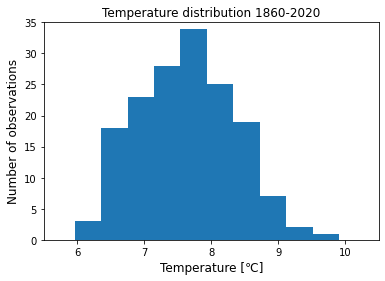

In [9]:
ax=plt.axes()
ax.hist(temp)
ax.set(
    title='Temperature distribution 1860-2020',
    ylabel='Number of observations',
    xlabel='Temperature [\u2103]', 
    xlim=[5.5,10.5], # limit the x-axis
    ylim=[0,35] # limit the y-axis
)
plt.show()

This is relatively bulky but gives a clear impression of the distribution. You can change the number of boxes (10 is default). Below there are 15 bins:

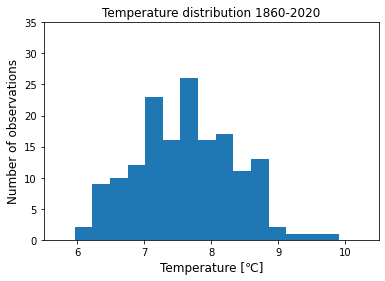

In [10]:
ax=plt.axes()
ax.hist(temp, bins=15)
ax.set(
    title='Temperature distribution 1860-2020',
    ylabel='Number of observations',
    xlabel='Temperature [\u2103]', 
    xlim=[5.5,10.5], # limit the x-axis
    ylim=[0,35] # limit the y-axis
)
plt.show()

This changes the impression of the distribution a bit, and gives some additional information in the two spikes that appears. The length of the time series (160 values), however, limits the usefulness of increasing the number of bins more. 

What if we load the same dataset but with monthly resolution instead? That will give us 12 times as many datapoints.   

In [12]:
# This is the same data set, but with monthly means. 
file='TempBergen.txt'
temp,time = loadData(file)
temp.shape


(161, 12)

temp.shape shows us that the data set is structured with year along the rows and month along the columns. If we plot the histogram of this directly, we get 12 overlapping histograms, which is not what we wanted - we wanted the histogram above but with higher resolution. Note that an improved version of the histogram below could be useful to compare the distribution between the months. 

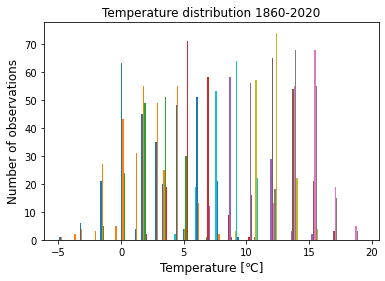

In [16]:
ax=plt.axes()
ax.hist(temp, bins=15)
ax.set(
    title='Temperature distribution 1860-2020',
    ylabel='Number of observations',
    xlabel='Temperature [\u2103]', 
)
plt.show()

We want to reshape the data set so that it's one long time series. We use the function `reshape` which has the syntax `np.reshape(x, shape)` where `x` is the variable, and `shape` is the shape you want. It's important that the new shape you assign fits the number of values in the original array. 

In [21]:
temp_vec=np.reshape(temp,(12*len(temp),)) 
temp_vec.shape, temp.shape, 161*12


((1932,), (161, 12), 1932)

Note now that temp_vec.shape=1932, which equals 161*12 which was the dimension of the original array. Since we just wanted a vector we could also have used the function `flatten()`. The figure below shows that the results are the same:


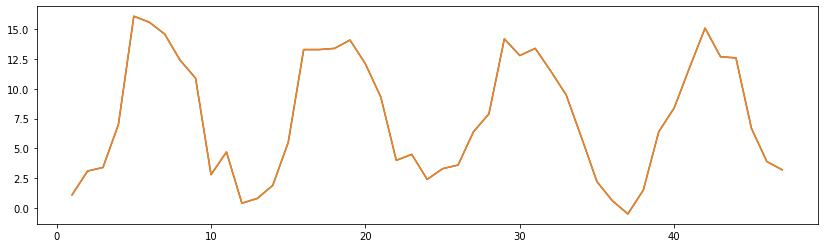

In [53]:
plt.figure(figsize=(14, 4))
plt.plot(temp.flatten()[:4*12])
plt.plot(temp_vec[:4*12])

### Exercise 3:

Make a histogram of `temp_vec`. Label the mean, median, and +\- one standard deviation using the function `plt.vlines()`. Why do you think there are two peaks? Make a figure that helps you explain what you think is the reason. 

### Exercise 4:
Make the histogram look good - change the colors, number of bins, edgecolor, binwidth etc. The documentation you need is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html). Pressing `Patch` under **kwargs gives you more information.
Optionally, try to add a best-fit line. 

Plot the first half of the time period in one color and the second period in another color to check if the distribution has changed. 

Consider the differences between the histogram when using yearly vs. monthly data - they're quite different, and draws the attention to different features. So what's the most useful choice depends on what you're discussing. 


### Scatterplot
Hvis man har to forskjellige variable kan det være nyttig å undersøke om det er en sammenheng mellom dem. Kanskje påvirkes den ene variablen av den andre? I GitHub mappen til Ekte Data finnes det datsett for flere variable enn temperatur som vi har sett på frem til nå, for eksempel nedbør. Under henter vi inn dette og lager et "scatterplot". I et scatterplot er den ene variabelen langs x-aksen og den andre langs y-aksen. Så lager man et punkt for hver verdi man har. I vårt tilfelle har vi to tidsserier - en for temperatur, en for nedbør. Vi lar temperatur være langs x-aksen og nedbør langs y-aksen, og lager en prikk for hvert tidssteg. 

Det er viktig at de to tidsseriene er like lange. For nedbør har vi bare verdier fra 1899. Vi må derfor kutte tidsserien for temperatur slik at de to tidsseriene dekker de samme årene. 

In [8]:
file='PrecipVestlandYearlyNonan.txt'
precip, tid_p = loadData(file)

file='TempBergenYearlyNonan.txt'
temp,tid_t = loadData(file)

In [9]:
print(tid_p[0])
print(tid_p[-1])
print(tid_t[0])
print(tid_t[-1])

start=np.nonzero(tid_t==tid_p[0]) # Finn indeksen der tid_t er lik det første året i tid_p
start=start[0][0] # [0][0] må med for å få tak i kun tallet

temp=temp[start:] # Slett starten av temperatur-tidsserien
tid_t=tid_t[start:]

1899.0
2020.0
1861.0
2020.0


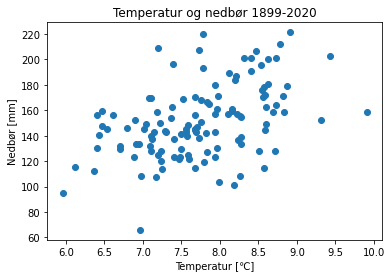

In [10]:
ax=plt.axes()
ax.scatter(temp,precip)
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.show()

#### Oppgave 6: 
Ser du et mønster her? Kan du si noe om forholdet mellom temperatur og nedbør? "Når temperturen er høy er ...". Tenk over hva du ville forvente - er inntrykket ditt at det regner mest når det er varmt eller kaldt? 


En vanlig ting å gjøre når man lager slike plot som dette er å fargekode prikkene. I figuren vår representerer hver prikk et år. Så vi kan fargekode prikkene etter år. 

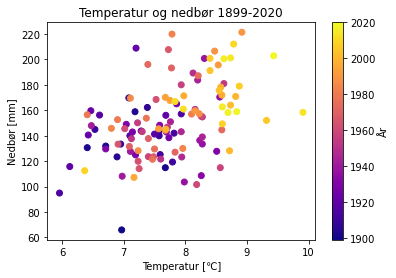

In [11]:
from matplotlib import cm # Denne pakken trengs for å lage fargeskalaen
cmap=cm.get_cmap('plasma',len(temp)) # cmap står for "colormap". Her definerer du hvilken fargeskala du vil bruke. 

colors = tid_t # Her definerer du at fargeskalaen skal basere seg på tidsvektoren din
ax=plt.axes()

# I linjen under plottes precip som en funksjon av temp, fargeskalaen settes til colors (definert rett over), fargekartet settes
# til cmap som du definerte over, og du setter min og makx grenser til fargeksalaen. 
sc=ax.scatter(temp,precip,c=colors,cmap=cmap,vmin=min(tid_t), vmax=max(tid_t)) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.colorbar(sc, label='År') # denne linjen gjør at fargeskalaen vises til høyre. 
plt.show()

#### Oppgave 7: 
Nå er lilla prikker starten av tidsserien og gule prikker nåtid. Hvilket system ser du nå? 

Dette kan man snu og vente på slik man vil. Hadde datasettet hatt enda en variabel, for eksempel soldager kunne man prøvd seg frem med å skifte på hvilke variabler som er langs aksene og hvilke som er fargekodet. Man kan også definere variabler med forskjellig størrelse på prikkene. Dette kunne funket for soldager - jo flere soldager, jo større plikk. Det kan imidlertid være en idé å ikke prøve å vise all informasjonen man har på en gang, da blir det etterhvert uoversiktlig. Men man kan prøve seg frem og lete etter systemer på denne måten! 

#### Oppgave 8: 
Bytt om få skriptet over slik at tid er langs x-aksen, temperatur langs y-aksen, og nedbør er fargekodet. Hvilket system ser du nå? Er det et system? Tenk på både ting som trendlinjer og fordeling av farge. 

### Kontur-plot
Den siste måten å fremstille data på som vi går gjennom i denne oppgaven er "Filled Contour"-plot. Kommendoen for disse er `contourf`. Dette er en god måte å vise to-dimensjonale datasett på hvor man har en variabel som er avhengig av to parametre. Variabsjon i variabelen vises med farger. I dette eksempelet har vi tid langs både x- og y-aksen. Det er ikke det mest typiske, vanligvis har man to ulike parametre her, for eksempel tid og dyp, tid og koordinat, eller lengdegrader og breddegrader. Dette er bare tre eksempler - man kan ha hva som helst langs disse to aksene, så lenge man har en tredje variabel som er avhengig av begge disse to parametrene. Her er temperatur denne variabelen som er avhengig av to ting: hvilken måned man er i, og hvilket år. I figuren er måneder langs x-aksen, år langs y-aksen, og selve temperaturen vises med farger definert med fargeskalaen til høyre: blått er kaldt, lysegrønn er varmt. I slike plot som dette må man *alltid* ha med en fargeskala - hvis ikke gir ikke fargene i selve figuren noen informasjon man kan bruke. 

In [12]:
file='TempVestlandMonthly.txt'
temp,tid = loadData(file)

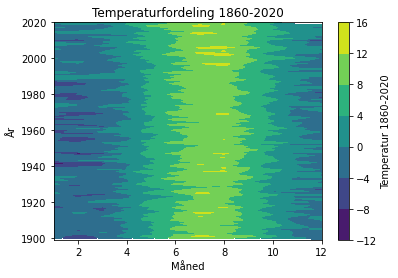

In [13]:
ax=plt.axes()
c=ax.contourf(np.linspace(1,12,12),tid,temp)
cbar=plt.colorbar(c)
cbar.set_label('Temperatur 1860-2020')
ax.set(
    title='Temperaturfordeling 1860-2020',
    ylabel='År',
    xlabel='Måned')
plt.show()

#### Oppgave 6:

Blått og grønt er kanskje ikke de mest intuitive fargene å bruke for å vise temperatur, men dette kan endres med å definere et annet `colormap`. Matplotlib sitt default colormap er det over, og heter "viridis". Klikk deg inn på https://matplotlib.org/stable/tutorials/colors/colormaps.html og finn et fint fargekart. Bytt ut 'X' i koden under med navnet på kartet du har valgt. 

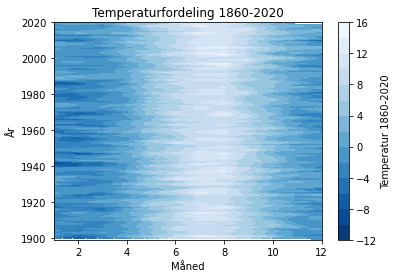

In [16]:
ax=plt.axes()
cmap=cm.get_cmap('Blues_r')
c=ax.contourf(
    np.linspace(1,12,12),tid,temp,
    cmap=cmap, # Her definerer du at fargekartet du har valgt skal brukes i denne figuren
    levels=15) # Angi hvor fin inndeling du vil ha på fargeskalaen
cbar=plt.colorbar(c)
cbar.set_label('Temperatur 1860-2020')
ax.set(
    title='Temperaturfordeling 1860-2020',
    ylabel='År',
    xlabel='Måned')
plt.show()

Å velge eller lage gode fargekart og sette fargeskalaen kan være nokså knotete i python. Det kan være nyttig å angi grenser til fargeskalaen, for eksempel la den gå fra -10 til 20 istedet for -6 til 20 som her, men da er det veldig viktig å være obs på at man gjør samme endringen på selve figuren og fargeskalaen (colorbaren). Dette krever et par work-arounds som vi ikke skal se på nå, men det er greit å være obs på at dette ikke alltid går som man vil automatisk - det trengs ofte veldig sydelig og detaljert definering siden fargeskalaen ikke oppdateres automatisk med nye grenser selv om man setter dette til contourf. 

Man bør også tenke på slike ting som hvilke farger som representerer hvilke verdier. Velger du f.eks. fargekartet "rwb" (red white blue) i oppgaven over uten å endre på "levels" så havner hvit på temperaturer mellom 6 og 8 grader. Intuitivt vil man tro at hvit er på null. Igjen, vi går ikke gjennom hvordan man kan endre dette i denne oppgaven, men slike ting bør tenkes over. 


In [ ]:
temp.shape